In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np
gamma = 1
# n=[640,1280,5120,10240,20480,40980,81920,163840,327680,655360,1310720,2621440]
n = [80,160,320,640,1280,5120,10240,20480,40980,81920,163840,327680,655360,1310720,2621440]


In [2]:
def createG(N,k,a):
    g_array= [0]*N
    for index in range(0,len(g_array)):
        if index%k >= (k-a):
            g_array[index]=1
    return g_array

In [3]:
def createHatG(N,k,a):
    hatg_array= [0]*N
    for index in range(0,len(hatg_array)):
        if index%(k) < a:
            hatg_array[index]=1
    hatg_array[N-1]=1
    return hatg_array

In [4]:
def calculateCost(hatg_array,g_array):
    i = 0
    algoCost = 0
    index = 1
    badCost = 0
    count_bad = 0
    for job in g_array:
        if job == 1 and hatg_array[i] == 0:
            algoCost = algoCost+pow(index,gamma)
            index = index+1
            
        elif job == 1 and hatg_array[i] == 1:
            algoCost = algoCost+pow(index,gamma)
            index=1
            
        elif job == 0 and hatg_array[i] == 1:
            badCost=badCost+pow(index,gamma)
            index = 1
            
        else:
            badCost=badCost+pow(index,gamma)
            index=index+1        
        i = i+1
        
    for job in g_array:
        if job == 0:
            count_bad = count_bad+1
    algoCost = algoCost+count_bad
    
    return algoCost, badCost

In [5]:
def makePlot(A_1,B_1,A_2,B_2,A_3,B_3,A_4,B_4,A_5,B_5,A_6,B_6):

    
    plt.loglog(B_1,A_1,'red',marker='.')
    plt.loglog(B_2,A_2,'teal',marker='o')
    plt.loglog(B_3,A_3,'orange',marker='s')
    plt.loglog(B_4,A_4,'black',marker='*')
    plt.loglog(B_5,A_5,'green',marker='v')
    plt.loglog(B_6,A_6,'yellow',marker='v')

    plt.axline([1000, 1000], [1000000, 1000000],linestyle ='--')
    #plt.xlim([10000, 1000000000000])
    #plt.ylim([1000, 10000000])

    plt.legend(['alpha=1','alpha=8','alpha=16','alpha=32','alpha=64'])
    plt.xlabel('Total Bad cost')
    plt.ylabel('Total Algorithm cost')
    plt.title('Simulation for gamma = 1')
    plt.show()

In [6]:
def LCharge_Simulate():
    alpha=[1,2,4,8,16,32] 
    A_1=[0]*(len(n))
    B_1=[0]*(len(n))
    A_2=[0]*(len(n))
    B_2=[0]*(len(n))
    A_3=[0]*(len(n))
    B_3=[0]*(len(n))
    A_4=[0]*(len(n))
    B_4=[0]*(len(n))
    A_5=[0]*(len(n))
    B_5=[0]*(len(n))
    A_6=[0]*(len(n))
    B_6=[0]*(len(n))
    for a in alpha:
        print('For alpha = ',a)
        i=0
        for N in n:
            result=[]
            hatg_array = createHatG(N,N,a)
            g_array = createG(N,N,a)
            print('Experiment with',N, 'partition')
            print('Experiment with',N, 'jobs')
            result = calculateCost(hatg_array,g_array)
            if a==alpha[0]:
                A_1[i] = result[0]
                B_1[i] = result[1]
            if a==alpha[1]:
                A_2[i] = result[0]
                B_2[i] = result[1]
            if a==alpha[2]:
                A_3[i] = result[0]
                B_3[i] = result[1]
            if a==alpha[3]:
                A_4[i] = result[0]
                B_4[i] = result[1]
            if a==alpha[4]:
                A_5[i] = result[0]
                B_5[i] = result[1]
            if a==alpha[5]:
                A_6[i] = result[0]
                B_6[i] = result[1]
            i=i+1
    print('A_1:',A_1)
    print('B_1:',B_1)
    print('A_2:',A_2)
    print('B_2:',B_2)
    print('A_3:',A_3)
    print('B_3:',B_3)
    print('A_4:',A_4)
    print('B_4:',B_4)
    print('A_5:',A_5)
    print('B_5:',B_5)
    print('A_6:',A_6)
    print('B_6:',B_6)
    makePlot(A_1,B_1,A_2,B_2,A_3,B_3,A_4,B_4,A_5,B_5,A_6,B_6)

For alpha =  1
Experiment with 80 partition
Experiment with 80 jobs
Experiment with 160 partition
Experiment with 160 jobs
Experiment with 320 partition
Experiment with 320 jobs
Experiment with 640 partition
Experiment with 640 jobs
Experiment with 1280 partition
Experiment with 1280 jobs
Experiment with 5120 partition
Experiment with 5120 jobs
Experiment with 10240 partition
Experiment with 10240 jobs
Experiment with 20480 partition
Experiment with 20480 jobs
Experiment with 40980 partition
Experiment with 40980 jobs
Experiment with 81920 partition
Experiment with 81920 jobs
Experiment with 163840 partition
Experiment with 163840 jobs
Experiment with 327680 partition
Experiment with 327680 jobs
Experiment with 655360 partition
Experiment with 655360 jobs
Experiment with 1310720 partition
Experiment with 1310720 jobs
Experiment with 2621440 partition
Experiment with 2621440 jobs
For alpha =  2
Experiment with 80 partition
Experiment with 80 jobs
Experiment with 160 partition
Experiment

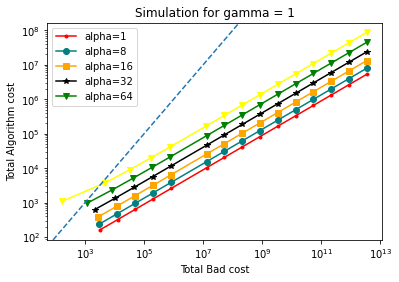

In [7]:
LCharge_Simulate()